In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

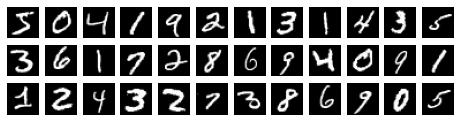

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

plt.figure(figsize=(8, 2)) # 8 x 2 inchs
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [ ]:
print(X_train.shape, X_train.dtype)
print(Y_train.shape, Y_train.dtype)
print(X_test.shape, X_test.dtype)
print(Y_test.shape, Y_test.dtype)

In [ ]:
# 층이 1개
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, input_dim=784, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.summary()

In [ ]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), verbose=2, batch_size=100, epochs=15, use_multiprocessing=True)
model.evaluate(X_test, Y_test, verbose=2, batch_size=100, use_multiprocessing=True)


In [ ]:
plt.figure(figsize=(8, 4)) # 8 x 4 inchs
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.title("Accuracy Graph")
plt.ylabel("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
prediction = model.predict(X_test[:1, :])
prediction_class = tf.argmax(prediction, 1)

print(f"\nPrediction Result:\n{prediction}")
print("Predicted class: ", prediction_class.numpy())
plt.imshow(X_test[prediction_class[0]])
plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(X_test[:20, :])
prediction_class = tf.argmax(prediction, 1)

print(f"\nPrediction Result:\n{prediction}")
print("Predicted class: ", prediction_class.numpy())

plt.figure(figsize=(8, 2)) # 8 x 2 inchs
for i in range(20):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_test[prediction_class[i]])
    plt.axis("off")
plt.show()


In [ ]:
# save model

file_name = "softmax_mnist_model.h5"
model.save(file_name)
print(f"\nThis model has been saved to {file_name}.")

In [3]:
#간단한 이미지 만들기
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
# ERROR 로그에 대해서 필터링 '3'

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
image=np.array([[[[1], [2], [3]],
                [[4], [5], [6]],
                [[7], [8], [9]]]], dtype=np.float32)

image.shape= (1, 3, 3, 1)


In [10]:
print('image.shape=', image.shape)
print('image.reshaped.shape=', image.reshape(3,3).shape)
print('image.reshaped:\n', image.reshape(3,3), sep='')

image.reshaped.shape= (3, 3)


In [11]:
print('image.reshaped:\n', image.reshape(3,3), sep='')


image.reshaped:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


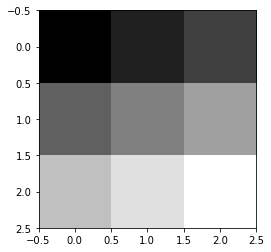

In [12]:
plt.imshow(image.reshape(3,3), cmap='gray')

In [13]:
# 필터 만들기
weight = tf.constant([[[[1.0]], [[1.0]]],
                     [[[1.0]], [[1.0]]]])
print('weight.shape', weight.shape)

weight.shape (2, 2, 1, 1)


In [14]:
weight_init=tf.constant_initializer(weight.numpy())
weight_img=tf.reshape(weight, (2,2))

In [16]:
print('weight.reshaped.shape=', weight_img.shape)
print('weight.reshaped:\n', weight_img.numpy(), sep='')

weight.reshaped.shape= (2, 2)
weight.reshaped:
[[1. 1.]
 [1. 1.]]


In [17]:
# 필터 적용하기
print("padding='VALID'")
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', kernel_initializer=weight_init)(image)

padding='VALID'


In [18]:
conv2d_img=conv2d.numpy()

In [19]:
print('conv2d_img.shape=', conv2d_img.shape)

conv2d_img.shape= (1, 2, 2, 1)


In [20]:
print('conv2d_img:\n', conv2d_img, sep='')

conv2d_img:
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


In [21]:
print('conv2d_img.reshaped.shape=', conv2d_img.reshape(2,2).shape)

conv2d_img.reshaped.shape= (2, 2)


In [23]:
print('conv2d_img.reshaped:\n', conv2d_img.reshape(2,2), sep='')

conv2d_img.reshaped:
[[12. 16.]
 [24. 28.]]


In [26]:
# padding 적용해서 filter
print("padding='SAME'")
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', kernel_initializer=weight_init)(image)
conv2d_img=conv2d.numpy()
print('conv2d_img.shape=', conv2d_img.shape)
print('conv2d_img:\n', conv2d_img, sep='')
print('conv2d_img.reshaped.shape=', conv2d_img.reshape(3,3).shape)
print('conv2d_img.reshaped:\n', conv2d_img.reshape(3,3), sep='')

padding='SAME'
conv2d_img.shape= (1, 3, 3, 1)
conv2d_img:
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
conv2d_img.reshaped.shape= (3, 3)
conv2d_img.reshaped:
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


In [28]:
# 필터 여러개 만들기
weight = tf.constant([[[[1.0, 10.0, -10]], [[1.0, 10.0, -1.0]]],
                    [[[1.0, 10.0, -1.0]], [[1.0, 10.0, -1.0]]]])

In [29]:
weight_img=weight.numpy()

In [30]:
print('weight.shape=', weight.shape)

weight.shape= (2, 2, 1, 3)


In [31]:
weight_init=tf.constant_initializer(weight.numpy())
weight_img=np.swapaxes(weight_img, 0, 3)

In [32]:
for i, one_img in enumerate(weight_img):
    print(one_img.reshape(2,2))

[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-10.  -1.]
 [ -1.  -1.]]


In [40]:
# 필터 적용
print("padding='SAME'")
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME', kernel_initializer=weight_init)(image)

padding='SAME'


In [41]:
conv2d_img=conv2d.numpy()

In [42]:
print('conv2d_img.shape=', conv2d_img.shape)

conv2d_img.shape= (1, 3, 3, 3)


In [43]:
conv2d_img=np.swapaxes(conv2d_img, 0, 3)

In [44]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-21. -34. -36.]
 [-60. -73. -69.]
 [-78. -89. -90.]]


In [45]:
# 풀링작업
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
image=np.array([[[[1], [2], [3]],
                [[4], [5], [6]],
                [[7], [8], [9]]]], dtype=np.float32)

In [46]:
print('image.shape=', image.shape)
print('image.reshaped.shape=', image.reshape(3,3).shape)
print('image.reshaped:\n', image.reshape(3,3), sep='')

image.shape= (1, 3, 3, 1)
image.reshaped.shape= (3, 3)
image.reshaped:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [48]:
print("padding='SAME'")
pool=tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
pool_img= pool.numpy()
print('pool_img.shape=', pool_img.shape)
covd2d_img=np.swapaxes(pool_img, 0,3)
for i, one_img in enumerate(pool_img):
    print(one_img.reshape(3,3))

padding='SAME'
pool_img.shape= (1, 3, 3, 1)
[[5. 6. 6.]
 [8. 9. 9.]
 [8. 9. 9.]]


In [68]:
# cnn 만들기-------------------------
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [69]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
Y_test=X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding='same'),
    #마지막은 dropout써줘도 되고 안써줘도됨
    
    tf.keras.layers.Flatten(), #여러개 필터들이 하나로 합쳐짐
    
    #Dense층 하나 생성
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [71]:
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
#모델 잘 만들어졌는지 확인하기
model.summary()

# 1번째 Conv2D층
# 3*3(필터크기) x 1(입력채널) x 32(출력채널) + 32 = 320(파라미터)

# 2번째 Conv2D층
# 3*3(필터크기) x 32(입력채널) x 64(출력채널) +64 = 18496(파라미터)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)        

In [74]:
hist = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),verbose = 2,batch_size=100,epochs=5,use_multiprocessing=True)
model.evaluate(X_test,Y_test,verbose=2,batch_size=100,use_multiprocessing=True)

Epoch 1/5


ValueError: in user code:

    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1323 test_function  *
        return step_function(self, iterator)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1307 run_step  **
        outputs = model.test_step(data)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1266 test_step
        y_pred = self(x, training=False)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (100, 28, 28)


In [ ]:
# Reporting.....

plt.figure(figsize=(8, 4)) # 8 x 4 inchs
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("Cost Graph")
plt.ylabel("cost")
plt.subplot(1, 2, 2)
plt.title("Performance Graph")
plt.ylabel("performance")
plt.plot(hist.history['accuracy'], 'b-', label="training accuracy")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation accuracy")
plt.legend()
plt.tight_layout()
plt.show()
print()